In [82]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as mpl
from sklearn import linear_model 
from sklearn.metrics import r2_score

In [7]:
df = pd.read_csv('data/FuelConsumption.csv')

In [8]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
df["ENGINESIZE"].head(10)

0    2.0
1    2.4
2    1.5
3    3.5
4    3.5
5    3.5
6    3.5
7    3.7
8    3.7
9    2.4
Name: ENGINESIZE, dtype: float64

In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
cdf = df[['MODELYEAR','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf.head(9)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2014,2.0,4,6.7,196
1,2014,2.4,4,7.7,221
2,2014,1.5,4,5.8,136
3,2014,3.5,6,9.1,255
4,2014,3.5,6,8.7,244
5,2014,3.5,6,7.7,230
6,2014,3.5,6,8.1,232
7,2014,3.7,6,9.0,255
8,2014,3.7,6,9.5,267


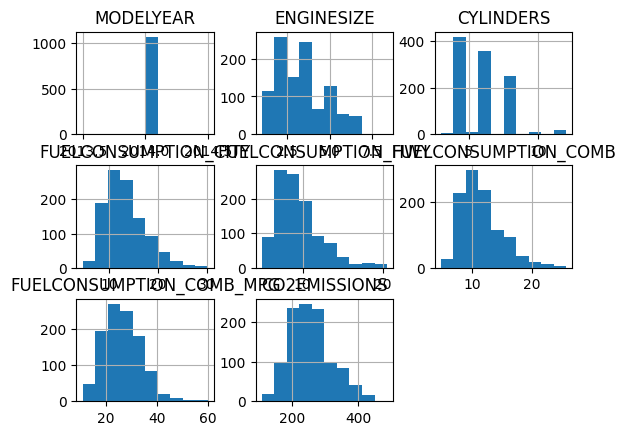

In [14]:
cdf = df[['MODELYEAR','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
viz = df.hist()

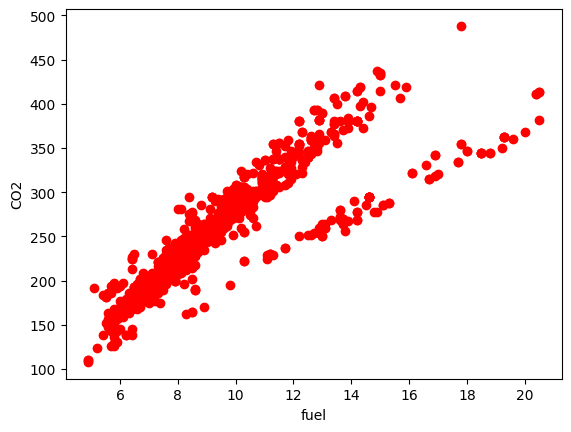

In [20]:
mpl.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS, color = 'red')
mpl.xlabel("fuel")
mpl.ylabel("CO2")
mpl.show()

In [24]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]


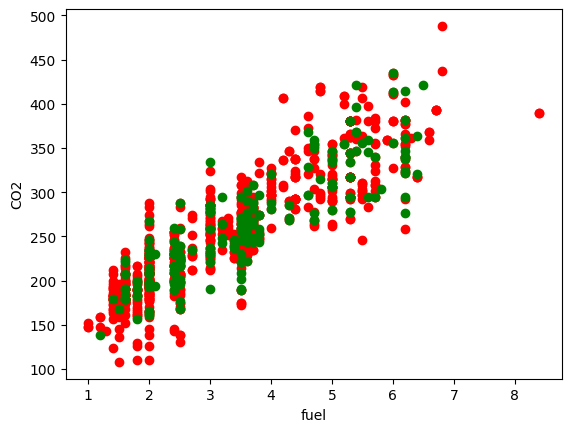

In [51]:
fig = mpl.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE,train.CO2EMISSIONS,  color ='red')
ax1.scatter(test.ENGINESIZE,test.CO2EMISSIONS, color ='green')
mpl.xlabel("fuel")
mpl.ylabel("CO2")
mpl.show()

In [84]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print('coefficient: ', regr.coef_)
print('intercept: ',regr.intercept_)

coefficient:  [[39.58684866]]
intercept:  [124.2086482]


Text(0, 0.5, 'EMISSIONS')

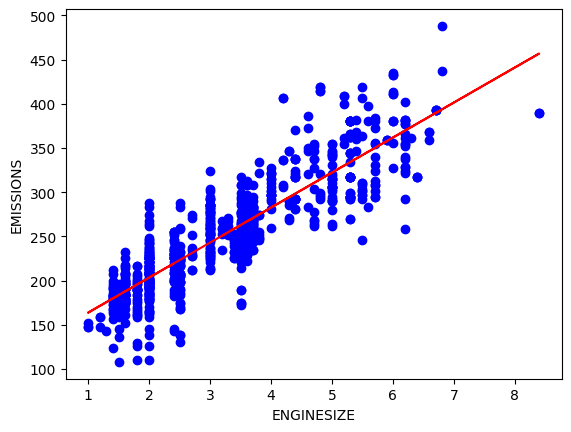

In [85]:
mpl.scatter(train.ENGINESIZE,train.CO2EMISSIONS,  color ='blue')
mpl.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')
mpl.xlabel("ENGINESIZE")
mpl.ylabel("EMISSIONS")

In [86]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_= regr.predict(test_x)
print('mean absolute error: %.2f '% np.mean(np.absolute(test_y_-test_y)))
print('residual sum of squares (MSE): %.2f'% np.mean((test_y_-test_y) ** 2))
print("R2-score: %.2f: " % r2_score(test_y,test_y_))

mean absolute error: 23.14 
residual sum of squares (MSE): 916.41
R2-score: 0.75: 
